# **Text pre-processing and exploration:**

In [24]:
import nltk
import os
import string 
import pandas as pd
import matplotlib.pyplot as plt

from pathlib import Path
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords, state_union
from nltk.stem import PorterStemmer
from collections import defaultdict
from pathlib import Path

nltk.download("stopwords")
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('state_union')

dataset_folder_path = Path( "C:\\Users\\Lior\\Desktop\\dataset_hw2")
training_file_name = "train_hw2.txt"
test_file_name = "test_hw2.txt"

tokens_to_remove = list(string.punctuation)
stop_words = set(stopwords.words("english")+tokens_to_remove)
#stop_words = set(stopwords.words("english"))
lemmatizer = nltk.WordNetLemmatizer()
ps = PorterStemmer()

terms_per_category = defaultdict(lambda: defaultdict(int))
documents_per_category = defaultdict(int)
common_words_dict = defaultdict(int)




[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Lior\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Lior\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Lior\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package state_union to
[nltk_data]     C:\Users\Lior\AppData\Roaming\nltk_data...
[nltk_data]   Package state_union is already up-to-date!


In [25]:
train_file_to_open = dataset_folder_path / training_file_name                              
source_train_file = open(train_file_to_open)
training_data = source_train_file.readlines()                                           

test_file_to_open = dataset_folder_path / test_file_name
source_test_file = open(test_file_to_open)
test_data =source_test_file.readlines()

In [26]:
def clean(input_data):
  cleaned_file = pd.DataFrame(columns=['data','target'])
  for raw in input_data:
    if not raw:
      continue
    #----------------------Lower-Case-------------------------------------------------#
    raw = raw.lower()
    #----------------------Tokenize---------------------------------------------------#
    word_tokens = word_tokenize(raw)
    #----------------------Remove-stopwords-------------------------------------------#
    filtered_sentence = [w for w in word_tokens if not w in stop_words]
    #----------------------Stemming---------------------------------------------------#
    raw_category = filtered_sentence.pop(0)
    cleaned_sentence = ""
    documents_per_category[raw_category] += 1 
    for word in filtered_sentence:
        stemmed_word = ps.stem(word)
        cleaned_sentence += stemmed_word +" "
        terms_per_category[raw_category][stemmed_word] += 1  
    cleaned_file.loc[len(cleaned_file.index)]=[cleaned_sentence[:-1],raw_category]
  return cleaned_file


In [27]:
def clear_dictionaries():
  terms_per_category.clear()
  documents_per_category.clear()

**Create dataset description table**

In [28]:
#training_path = os.path.join(dataset_folder_path, training_file_name)
clear_dictionaries()
processed_training_data = clean(training_data)
dataset_description = pd.DataFrame(sorted(documents_per_category.items()), columns=['Category', '#train docs'])
clear_dictionaries()
processed_test_data = clean(test_data)
dataset_description['#test docs'] = dict(sorted(documents_per_category.items())).values()
clean(training_data)
dataset_description['Total #docs'] = dict(sorted(documents_per_category.items())).values()




# **Explore the dataset**

**Amount of categories**

In [29]:
print ("Amount of categories is:  %d" % (len(documents_per_category)))

categories_list = []
for category in documents_per_category:
  categories_list.append(category)

df = pd.DataFrame(categories_list, columns=['Category'])

df

Amount of categories is:  8


,Category
0,trade
1,grain
2,ship
3,acq
4,earn
5,money-fx
6,interest
7,crude


**Amount of documents from each category**

In [30]:
dataset_description


,Category,#train docs,#test docs,Total #docs
0,acq,1596,696,2292
1,crude,253,121,374
2,earn,2840,1083,3923
3,grain,41,10,51
4,interest,190,81,271
5,money-fx,206,87,293
6,ship,108,36,144
7,trade,251,75,326


**Terms distribution per category**

In [31]:
def print_table_by_category(category, sorted_top_ten):
    print ('_' * 37)
    for word in dict(sorted_top_ten).keys():
      common_words_dict[word] += 1
    df = pd.DataFrame(sorted_top_ten, columns=['Category', '#of 10 top terms']) 
    print ('Top 10 terms for category : '+ category)
    print ('_' * 37)
    print (df)

In [ ]:
def print_plot_per_category_by_term(category, input):
    instances_threshold = 50
    dict_input = (dict((k, v) for k, v in input.items() if v >= instances_threshold)) 
    dict_input = {k: v for k, v in sorted(dict_input.items(), key=lambda item: item[1], reverse=True)}
    plt.title("Term Frequency per term in category: " + str(category))
    plt.xlabel('Term')
    plt.ylabel('Term Frequency')
    plt.bar(list(dict_input.keys()), height = dict_input.values(), width= 2, color='g')
    plt.show()


In [33]:
def print_plot_per_category_by_instances(category, input):
    count_frequency_dict = dict()
    instances_threshold = 5
    max_val = max(input.values()) + 1
    for i in range(max_val):
      count_frequency_dict[i] = 0
    for term in input:
        count_frequency_dict[input[term]] += 1
    dict_input = (dict((k, v) for k, v in count_frequency_dict.items() if v >= instances_threshold)) 
    dict_input = {k: v for k, v in sorted(dict_input.items(), key=lambda item: item[1], reverse=True)}
    plt.title("Count different Frequencies in category: " + str(category))
    plt.xlabel('Frequency')
    plt.ylabel('Count')
    plt.bar(list(dict_input.keys()), dict_input.values(), color='b')
    plt.show()

_____________________________________
Top 10 terms for category : acq
_____________________________________
  Category  #of 10 top terms
0     said              6726
1    share              3190
2      dlr              2982
3  compani              2638
4   reuter              2143
5      mln              2103
6      inc              1997
7      pct              1852
8    offer              1604
9     corp              1572
_____________________________________
Top 10 terms for category : crude
_____________________________________
  Category  #of 10 top terms
0      oil              1507
1     said              1453
2    price               697
3      dlr               540
4     opec               528
5    crude               505
6   barrel               492
7      mln               492
8      bpd               394
9   reuter               364
_____________________________________
Top 10 terms for category : earn
_____________________________________
  Category  #of 10 top terms
0     

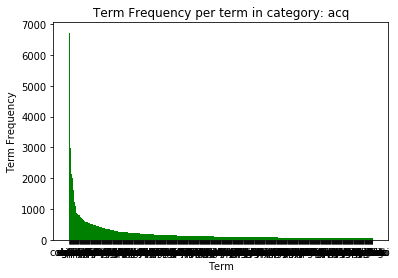

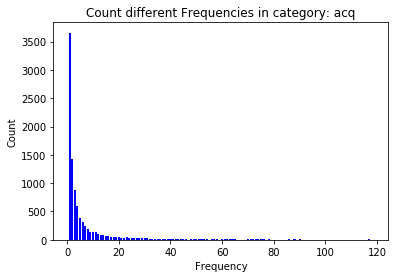

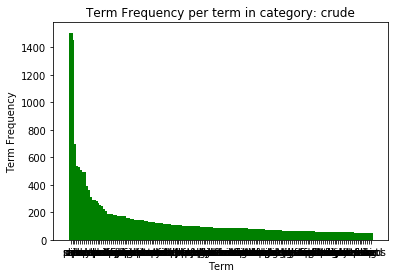

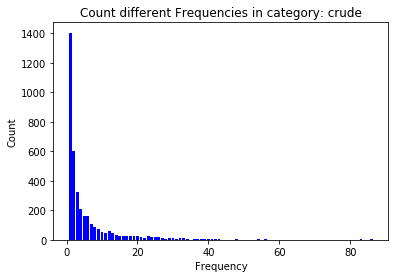

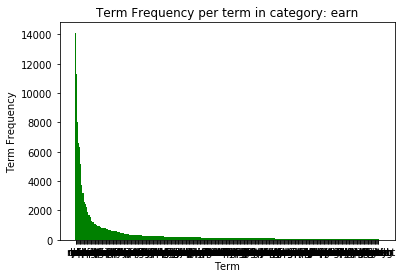

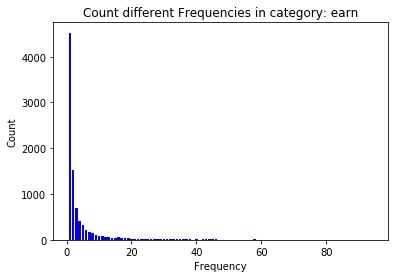

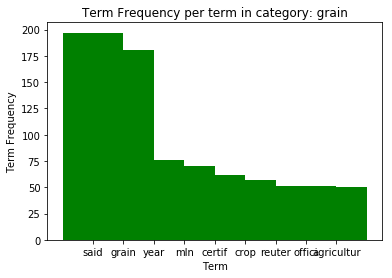

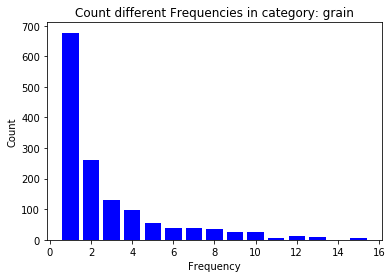

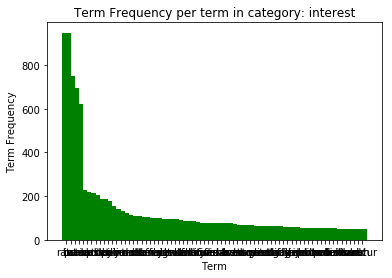

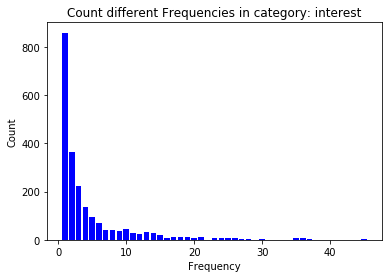

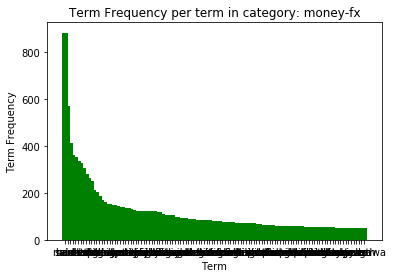

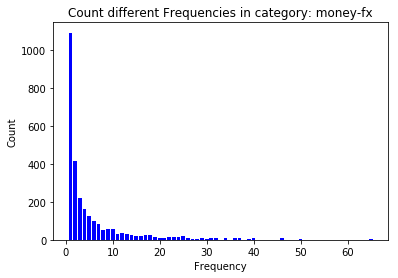

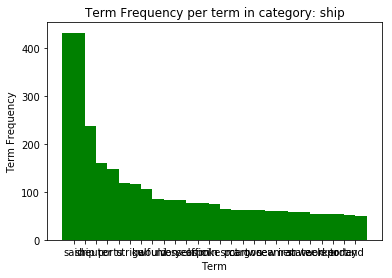

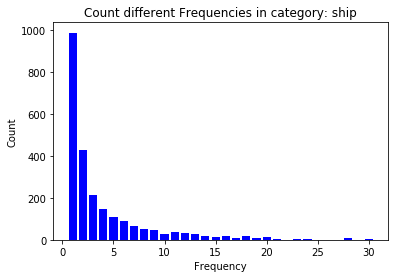

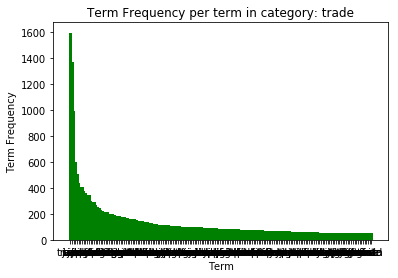

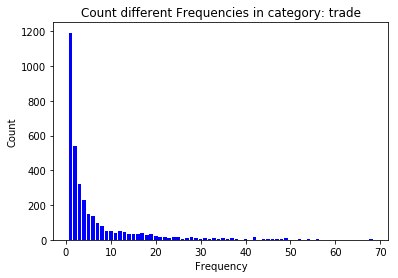

In [34]:
common_words_dict.clear()
for category in sorted(terms_per_category):
  sorted_top_ten = sorted(terms_per_category[category].items(), key=lambda item: item[1] , reverse=True)[:10]
  print_table_by_category(category, sorted_top_ten)
  print_plot_per_category_by_term(category, dict(terms_per_category[category]))
  print_plot_per_category_by_instances(category, dict(terms_per_category[category]))

**Check for common words in multiple categories**

While checking the most common words in each category we have found some words that are frequent in more than half of them. So, we can remove these common words by adding them to stop words' list.


In [35]:
additional_stop_words= []

for common_word in common_words_dict.keys():
  if common_words_dict[common_word] >= (len(categories_list) * 1/2 ):
    additional_stop_words.append(common_word)

for word in additional_stop_words:
  stop_words.add(word)




# **Expected Challenges**
The expected challenges are:
1.   Some categories have common words that are among the most common words for the category. Such words can not help us to distinguish between the class (category) of the categories.
2.   Difficulties in finding suitable libraries and adapting to using Python language.
3.   Dealing with machine learning algorithms and parameter tuning to achieve maximum accuracy value.





# **Document Classification**

**Text feature extraction**

In [36]:
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer

def process_vectorizer(name):
  print("Extracting features from the training data using a sparse vectorizer")
  if name == 'TfidfVectorizer':
    vectorizer = TfidfVectorizer(sublinear_tf=True, max_df=0.5,
                                 stop_words=stop_words)
  else:
    vectorizer = CountVectorizer()
  X_train = vectorizer.fit_transform(processed_training_data.data)
  print("Extracting features from the test data using the same vectorizer")
  X_test = vectorizer.transform(processed_test_data.data)
  return X_train,X_test






**Benchmark classifiers**

In [37]:
from sklearn import metrics

results =  pd.DataFrame(columns=['Classifier', 'Vectorizer', 'Accuracy'])
results.iloc[0:0]

def benchmark(clf,X_train,X_test):
    print('_' * 80)
    print("Training: ")
    print(clf)
    clf.fit(X_train, processed_training_data.target)
    pred = clf.predict(X_test)
    score = metrics.accuracy_score(processed_test_data.target, pred)
    print("accuracy:   %0.3f" % score)
    print()
    return score



**SVM**

In [38]:
from sklearn.linear_model import SGDClassifier

print("SVM")
X_train,X_test = process_vectorizer("TfidfVectorizer")
svm_score = benchmark(SGDClassifier(),X_train,X_test)
results.loc[len(results.index)]=["SVM","TfidfVectorizer",svm_score]
print("_"*80)
X_train,X_test = process_vectorizer("CountVectorizer")
svm_score = benchmark(SGDClassifier(),X_train,X_test)
results.loc[len(results.index)]=["SVM","CountVectorizer",svm_score]

SVM
Extracting features from the training data using a sparse vectorizer
Extracting features from the test data using the same vectorizer
________________________________________________________________________________
Training: 
SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)
accuracy:   0.976

________________________________________________________________________________
Extracting features from the training data using a sparse vectorizer
Extracting features from the test data using the same vectorizer
________________________________________________________________________________
Training: 
SGDClassifier(alpha=

**Naive Bayes**

In [39]:
from sklearn.naive_bayes import MultinomialNB

print("Naive Bayes")
X_train,X_test = process_vectorizer("TfidfVectorizer")
nb_score = benchmark(MultinomialNB(),X_train,X_test)
results.loc[len(results.index)]=["Naive Bayes","TfidfVectorizer",nb_score]
print("_"*80)
X_train,X_test =process_vectorizer("CountVectorizer")
nb_score = benchmark(MultinomialNB(),X_train,X_test)
results.loc[len(results.index)]=["Naive Bayes","CountVectorizer",nb_score]

Naive Bayes
Extracting features from the training data using a sparse vectorizer
Extracting features from the test data using the same vectorizer
________________________________________________________________________________
Training: 
MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)
accuracy:   0.844

________________________________________________________________________________
Extracting features from the training data using a sparse vectorizer
Extracting features from the test data using the same vectorizer
________________________________________________________________________________
Training: 
MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)
accuracy:   0.961



**Perceptron**

In [40]:
from sklearn.linear_model import Perceptron

print("Perceptron")
X_train,X_test = process_vectorizer("TfidfVectorizer")
perceptron_score = benchmark(Perceptron(),X_train,X_test)
results.loc[len(results.index)]=["Perceptron","TfidfVectorizer",perceptron_score]
print("_"*80)
X_train,X_test = process_vectorizer("CountVectorizer")
perceptron_score = benchmark(Perceptron(),X_train,X_test)
results.loc[len(results.index)]=["Perceptron","CountVectorizer",perceptron_score]

Perceptron
Extracting features from the training data using a sparse vectorizer
Extracting features from the test data using the same vectorizer
________________________________________________________________________________
Training: 
Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1.0,
           fit_intercept=True, max_iter=1000, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=0, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)
accuracy:   0.965

________________________________________________________________________________
Extracting features from the training data using a sparse vectorizer
Extracting features from the test data using the same vectorizer
________________________________________________________________________________
Training: 
Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1.0,
           fit_intercept=True, max_iter=1000, n_iter_no_change=5, n_jobs=No

**Decision Tree**

In [41]:
from sklearn.tree import DecisionTreeClassifier

print("Decision Tree")
X_train,X_test = process_vectorizer("TfidfVectorizer")
decisionTree_score = benchmark(DecisionTreeClassifier(),X_train,X_test)
results.loc[len(results.index)]=["Decision Tree","TfidfVectorizer",decisionTree_score]
print("_"*80)
X_train,X_test = process_vectorizer("CountVectorizer")
decisionTree_score = benchmark(DecisionTreeClassifier(),X_train,X_test)
results.loc[len(results.index)]=["Decision Tree","CountVectorizer",decisionTree_score]

Decision Tree
Extracting features from the training data using a sparse vectorizer
Extracting features from the test data using the same vectorizer
________________________________________________________________________________
Training: 
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')
accuracy:   0.896

________________________________________________________________________________
Extracting features from the training data using a sparse vectorizer
Extracting features from the test data using the same vectorizer
________________________________________________________________________________
Training: 
DecisionTreeClassifier(class_

# **Comparison between different models**

In [45]:
results

,Classifier,Vectorizer,Accuracy
0,SVM,TfidfVectorizer,0.975788
1,SVM,CountVectorizer,0.973961
2,Naive Bayes,TfidfVectorizer,0.844221
3,Naive Bayes,CountVectorizer,0.960713
4,Perceptron,TfidfVectorizer,0.965281
5,Perceptron,CountVectorizer,0.964367
6,Decision Tree,TfidfVectorizer,0.896300
7,Decision Tree,CountVectorizer,0.914116


**Optimization imports**

In [46]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

optimized =[]
optimized =  pd.DataFrame(columns=['Classifier Name', 'Vectorizer Name','Parameters', 'Accuracy'])

**Optimize the Naive Bayes Classifier -- using TfidfVectorizer**

In [47]:
nb_clf = Pipeline([('vect', TfidfVectorizer()),('clf', MultinomialNB())])
parameters =  {'vect__max_df': (0.3,0.4,0.5,0.6,0.7, 0.75, 1.0),
               'vect__sublinear_tf': [True],
               'vect__stop_words': [stop_words],
               'vect__ngram_range': ((1, 1), (1, 2)),# unigrams or bigrams
               'clf__alpha': (0.01,1.0),
               'clf__fit_prior':[False, True]}
gs_clf = GridSearchCV(nb_clf, parameters, n_jobs=1)
gs_clf = gs_clf.fit(processed_training_data.data,processed_training_data.target)
optimized.loc[len(optimized.index)]=["Naive Bayes","TfidfVectorizer",gs_clf.best_params_,gs_clf.best_score_]


c:\users\lior\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


**Optimize the Naive Bayes Classifier -- using CountVectorizer**

In [48]:
nb_clf = Pipeline([('vect', CountVectorizer()),('clf', MultinomialNB())])
parameters =  {'vect__max_df': (0.3,0.4,0.5,0.6,0.7, 0.75, 1.0),
               'vect__stop_words': [stop_words],
               'vect__ngram_range': ((1, 1), (1, 2)),# unigrams or bigrams
               'clf__alpha': (0.01,1.0),
               'clf__fit_prior':[False, True]}
gs_clf = GridSearchCV(nb_clf, parameters, n_jobs=1)
gs_clf = gs_clf.fit(processed_training_data.data,processed_training_data.target)
optimized.loc[len(optimized.index)]=["Naive Bayes","CountVectorizer",gs_clf.best_params_,gs_clf.best_score_]

c:\users\lior\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


**Optimize the Decision Tree Classifier -- using TfidfVectorizer**

In [49]:
decisionTree_clf = Pipeline([('vect', TfidfVectorizer()),('clf', DecisionTreeClassifier())])
parameters =  {'vect__max_df': (0.3,0.4,0.5,0.6,0.7, 0.75, 1.0),
               'vect__sublinear_tf': [True],
               'vect__stop_words': [stop_words],
               'vect__ngram_range': ((1, 1), (1, 2)),# unigrams or bigrams
               'clf__criterion':['gini', 'entropy'],
               'clf__max_features': ('auto', 'log2')}
gs_decisionTree = GridSearchCV(decisionTree_clf, parameters)
gs_decisionTree =gs_decisionTree.fit(processed_training_data.data,processed_training_data.target)
optimized.loc[len(optimized.index)]=["Decision Tree","TfidfVectorizer",gs_decisionTree.best_params_,gs_decisionTree.best_score_]




c:\users\lior\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


**Optimize the Decision Tree Classifier -- using CountVectorizer**

In [50]:
decisionTree_clf = Pipeline([('vect', CountVectorizer()),('clf', DecisionTreeClassifier())])
parameters =  {'vect__max_df': (0.3,0.4,0.5,0.6,0.7, 0.75, 1.0),
               'vect__stop_words': [stop_words],
               'vect__ngram_range': ((1, 1), (1, 2)),# unigrams or bigrams
               'clf__criterion':['gini', 'entropy'],
               'clf__max_features': ('auto', 'log2')}
gs_decisionTree = GridSearchCV(decisionTree_clf, parameters)
gs_decisionTree =gs_decisionTree.fit(processed_training_data.data,processed_training_data.target)
optimized.loc[len(optimized.index)]=["Decision Tree","CountVectorizer",gs_decisionTree.best_params_,gs_decisionTree.best_score_]

c:\users\lior\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


**Optimize the SVM Classifier -- using TfidfVectorizer**

In [60]:
#from sklearn.externals import joblib
sgd_clf = Pipeline([('vect', TfidfVectorizer()),('clf', SGDClassifier())])
parameters =  {'vect__max_df': (0.3,0.4,0.5,0.6,0.7, 0.75, 1.0),
               'vect__sublinear_tf': [True],
               'vect__stop_words': [stop_words],
               'vect__ngram_range': ((1, 1), (1, 2)),# unigrams or bigrams
               'clf__alpha': (0.0001, 0.001, 0.01), 
               'clf__penalty': ('l1','l2')}
gs_svm = GridSearchCV(sgd_clf, parameters)
gs_svm =gs_svm.fit(processed_training_data.data,processed_training_data.target)
optimized.loc[len(optimized.index)]=["SVM","TfidfVectorizer",gs_svm.best_params_,gs_svm.best_score_]
#joblib.dump(gs_svm.best_estimator_, 'BestModel.pkl', compress = 1)

c:\users\lior\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


['BestModel.pkl']

**Optimize the SVM Classifier -- using CountVectorizer**

In [52]:
sgd_clf = Pipeline([('vect', CountVectorizer()),('clf', SGDClassifier())])
parameters =  {'vect__max_df': (0.3,0.4,0.5,0.6,0.7, 0.75, 1.0),
               'vect__stop_words': [stop_words],
               'vect__ngram_range': ((1, 1), (1, 2)),# unigrams or bigrams
               'clf__alpha': (0.0001, 0.001, 0.01), 
               'clf__penalty': ('l1','l2')}
gs_svm = GridSearchCV(sgd_clf, parameters)
gs_svm =gs_svm.fit(processed_training_data.data,processed_training_data.target)
optimized.loc[len(optimized.index)]=["SVM","CountVectorizer",gs_svm.best_params_,gs_svm.best_score_]

c:\users\lior\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


**Optimize the Perceptron Classifier -- using TfidfVectorizer**

In [53]:
perceptron_clf = Pipeline([('vect', TfidfVectorizer()),('clf', Perceptron())])
parameters =  {'vect__max_df': (0.3,0.4,0.5,0.6,0.7, 0.75, 1.0),
               'vect__sublinear_tf': [True],
               'vect__stop_words': [stop_words],
               'vect__ngram_range': ((1, 1), (1, 2)),# unigrams or bigrams
               'clf__alpha': (0.0001, 0.001, 0.01), 
               'clf__penalty': ('l1','l2')}
gs_perceptron = GridSearchCV(perceptron_clf, parameters)
gs_perceptron =gs_perceptron.fit(processed_training_data.data,processed_training_data.target)
optimized.loc[len(optimized.index)]=["Perceptron","TfidfVectorizer",gs_perceptron.best_params_,gs_perceptron.best_score_]

c:\users\lior\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


**Optimize the Perceptron Classifier -- using CountVectorizer**

In [54]:
perceptron_clf = Pipeline([('vect', CountVectorizer()),('clf', Perceptron())])
parameters =  {'vect__max_df': (0.3,0.4,0.5,0.6,0.7, 0.75, 1.0),
               'vect__stop_words': [stop_words],
               'vect__ngram_range': ((1, 1), (1, 2)),# unigrams or bigrams
               'clf__alpha': (0.0001, 0.001, 0.01), 
               'clf__penalty': ('l1','l2')}
gs_perceptron = GridSearchCV(perceptron_clf, parameters)
gs_perceptron =gs_perceptron.fit(processed_training_data.data,processed_training_data.target)
optimized.loc[len(optimized.index)]=["Perceptron","CountVectorizer",gs_perceptron.best_params_,gs_perceptron.best_score_]

c:\users\lior\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


In [55]:
optimized

,Classifier Name,Vectorizer Name,Parameters,Accuracy
0,Naive Bayes,TfidfVectorizer,"{'clf__alpha': 0.01, 'clf__fit_prior': True, '...",0.944211
1,Naive Bayes,CountVectorizer,"{'clf__alpha': 1.0, 'clf__fit_prior': False, '...",0.947129
2,Decision Tree,TfidfVectorizer,"{'clf__criterion': 'gini', 'clf__max_features'...",0.802735
3,Decision Tree,CountVectorizer,"{'clf__criterion': 'entropy', 'clf__max_featur...",0.802188
4,SVM,TfidfVectorizer,"{'clf__alpha': 0.0001, 'clf__penalty': 'l2', '...",0.971012
5,SVM,CountVectorizer,"{'clf__alpha': 0.001, 'clf__penalty': 'l2', 'v...",0.967912
6,Perceptron,TfidfVectorizer,"{'clf__alpha': 0.0001, 'clf__penalty': 'l2', '...",0.953145
7,Perceptron,CountVectorizer,"{'clf__alpha': 0.0001, 'clf__penalty': 'l1', '...",0.962443


In [57]:
optimized = optimized.sort_values('Accuracy', ascending=False)
print("The best model is "+str(optimized.iloc[0]['Classifier Name'])+" with "+str(optimized.iloc[0]['Vectorizer Name'])+" vectorizer")
print("The parameters of the model and the vectorizer are: ")
for parameter in optimized.iloc[0]['Parameters']:
  if "stop_words" in parameter:
    print("stop_words: English,punctuation")
  else:
    print(str(parameter)+" : "+str(optimized.iloc[0]['Parameters'][parameter]))

#print(optimized.iloc[0]['Parameters'])
print ("The accuracy of the model is "+str(optimized.iloc[0]['Accuracy']))


The best model is SVM with TfidfVectorizer vectorizer
The parameters of the model and the vectorizer are: 
clf__alpha : 0.0001
clf__penalty : l2
vect__max_df : 0.5
vect__ngram_range : (1, 2)
stop_words: English,punctuation
vect__sublinear_tf : True
The accuracy of the model is 0.9710118505013674


# **Best Model Selected**

The accuracy of the best model is: 0.9715587967183227<br><br>
The permutation of feature extraction method and classifier which got the best score is : TfidfVectorizer (feature extraction method) and SVM (classifier).<br><br>
The challenges were to find estimate which parameters we should optimize in order to get the best score that we can reach.  We handled those challenges by reading the documentation of each parameter we have used in order to reach the optimized score. In addition, running experiments was very helpful in this case.

# **Task challenges and Effective solutions**

Our main challenge in this task (documents classification) was to explore and find the best method to use for feature extraction for each classifier we have used. Moreover, tune each model parameters and optimize each permutation of feature extraction method and classifier was a difficult task.<br><br>
Our main obstacle was in finding the classifier that we would use in this task. We found a big a variety of classifiers and we tried to understand which of them will suit our task in the best way. Effective solution for it was doing a small research in the Internet in order to understand which classifier will suit our task in the best way.<br><br>
While trying each permutation of feature extraction method and classifier we got different accuracy’ scores and we realized that there are some feature extraction methods that match much better for a specific classifier. We handled this obstacle by trying different feature extraction methods and finally choose the best two for creating different permutation for our task (and by investigating each feature extraction we use with comparison of our needs).<br><br>
Another big challenge we had in this task was the optimization of the models we have created. We thought how to choose the values of the hyper-parameters for optimal results. Our solution was to read about each classifier and research on the main hyper-parameters and experimenting different values until we have reached the best results for each permutation of feature extraction method and classifier.
